# 插值

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

設置 **`Numpy`** 浮點數顯示格式：

In [2]:
np.set_printoptions(precision=2, suppress=True)

從文本中讀入數據，數據來自 http://kinetics.nist.gov/janaf/html/C-067.txt ，保存為結構體數組：

In [3]:
data = np.genfromtxt("JANAF_CH4.txt", 
                  delimiter="\t", # TAB 分隔
                  skiprows=1,     # 忽略首行
                  names=True,     # 讀入屬性
                  missing_values="INFINITE",  # 缺失值
                  filling_values=np.inf)      # 填充缺失值

顯示部分數據：

In [4]:
for row in data[:7]:
    print "{}\t{}".format(row['TK'], row['Cp'])
print "...\t..."

0.0	0.0
100.0	33.258
200.0	33.473
250.0	34.216
298.15	35.639
300.0	35.708
350.0	37.874
...	...


繪圖：

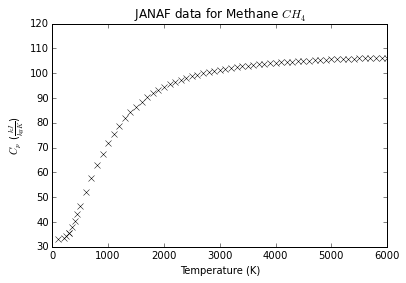

In [5]:
p = plt.plot(data['TK'], data['Cp'], 'kx')
t = plt.title("JANAF data for Methane $CH_4$")
a = plt.axis([0, 6000, 30, 120])
x = plt.xlabel("Temperature (K)")
y = plt.ylabel(r"$C_p$ ($\frac{kJ}{kg K}$)")

## 插值

假設我們要對這組數據進行插值。

先導入一維插值函數 `interp1d`：

    interp1d(x, y)

In [6]:
from scipy.interpolate import interp1d

In [7]:
ch4_cp = interp1d(data['TK'], data['Cp'])

`interp1d` 的返回值可以像函數一樣接受輸入，並返回插值的結果。

單個輸入值，注意返回的是數組：

In [8]:
ch4_cp(382.2)

array(39.565144000000004)

輸入數組，返回的是對應的數組：

In [9]:
ch4_cp([32.2,323.2])

array([ 10.71,  36.71])

預設情況下，輸入值要在插值允許的範圍內，否則插值會報錯：

In [10]:
ch4_cp(8752)

ValueError: A value in x_new is above the interpolation range.

但我們可以通過參數設置允許超出範圍的值存在：

In [11]:
ch4_cp = interp1d(data['TK'], data['Cp'], 
                  bounds_error=False)

不過由於超出範圍，所以插值的輸出是非法值：

In [12]:
ch4_cp(8752)

array(nan)

可以使用指定值替代這些非法值：

In [13]:
ch4_cp = interp1d(data['TK'], data['Cp'], 
                  bounds_error=False, fill_value=-999.25)

In [14]:
ch4_cp(8752)

array(-999.25)

### 線性插值

`interp1d` 預設的插值方法是線性，關於線性插值的定義，請參見：

- 維基百科-線性插值： https://zh.wikipedia.org/wiki/%E7%BA%BF%E6%80%A7%E6%8F%92%E5%80%BC
- 百度百科-線性插值： http://baike.baidu.com/view/4685624.htm

其基本思想是，已知相鄰兩點 $x_1,x_2$ 對應的值 $y_1,y_2$ ，那麼對於 $(x_1,x_2)$ 之間的某一點 $x$ ，線性插值對應的值 $y$ 滿足：點 $(x,y)$ 在 $(x_1,y_1),(x_2,y_2)$ 所形成的線段上。

應用線性插值：

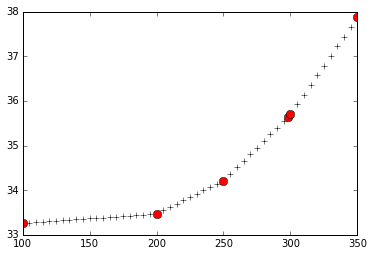

In [15]:
T = np.arange(100,355,5)
plt.plot(T, ch4_cp(T), "+k")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

其中紅色的圓點為原來的數據點，黑色的十字點為對應的插值點，可以明顯看到，相鄰的數據點的插值在一條直線上。

### 多項式插值

我們可以通過 `kind` 參數來調節使用的插值方法，來得到不同的結果：

- `nearest` 最近鄰插值
- `zero` 0階插值
- `linear` 線性插值
- `quadratic` 二次插值
- `cubic` 三次插值
- `4,5,6,7` 更高階插值

最近鄰插值：

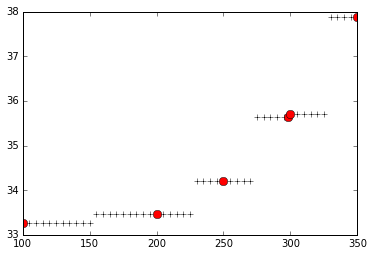

In [16]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="nearest")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

0階插值：

In [17]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="zero")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

二次插值：

In [18]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="quadratic")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

三次插值：

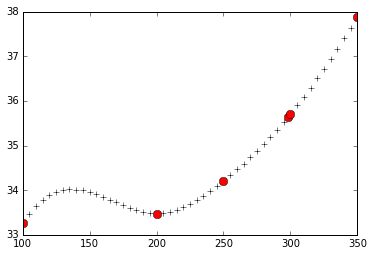

In [19]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="cubic")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

事實上，我們可以使用更高階的多項式插值，只要將 `kind` 設為對應的數字即可：

四次多項式插值：

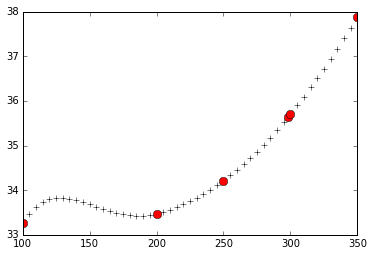

In [20]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind=4)
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

可以參見：

- 維基百科-多項式插值：https://zh.wikipedia.org/wiki/%E5%A4%9A%E9%A1%B9%E5%BC%8F%E6%8F%92%E5%80%BC
- 百度百科-插值法：http://baike.baidu.com/view/754506.htm

對於二維乃至更高維度的多項式插值：

In [21]:
from scipy.interpolate import interp2d, interpnd

其使用方法與一維類似。

### 徑向基函數

關於徑向基函數，可以參閲：
- 維基百科-Radial basis fucntion：https://en.wikipedia.org/wiki/Radial_basis_function

徑向基函數，簡單來說就是點 $x$ 處的函數值只依賴于 $x$ 與某點 $c$ 的距離：

$$\Phi(x,c) = \Phi(\|x-c\|)$$

In [22]:
x = np.linspace(-3,3,100)

常用的徑向基（`RBF`）函數有：

高斯函數：

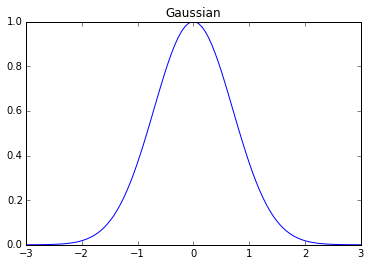

In [23]:
plt.plot(x, np.exp(-1 * x **2))
t = plt.title("Gaussian")

`Multiquadric` 函數：

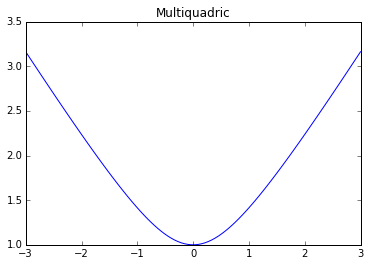

In [24]:
plt.plot(x, np.sqrt(1 + x **2))
t = plt.title("Multiquadric")

`Inverse Multiquadric` 函數：

In [25]:
plt.plot(x, 1. / np.sqrt(1 + x **2))
t = plt.title("Inverse Multiquadric")

### 徑向基函數插值

對於徑向基函數，其插值的公式為：

$$
f(x) = \sum_j n_j \Phi(\|x-x_j\|)
$$

我們通過數據點 $x_j$ 來計算出 $n_j$ 的值，來計算 $x$ 處的插值結果。

In [26]:
from scipy.interpolate.rbf import Rbf

使用 `multiquadric` 核的：

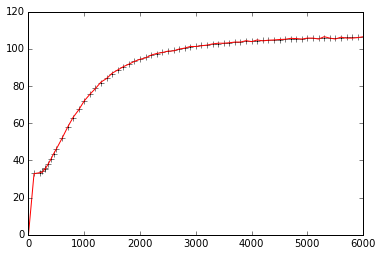

In [27]:
cp_rbf = Rbf(data['TK'], data['Cp'], function = "multiquadric")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

使用 `gaussian` 核：

In [28]:
cp_rbf = Rbf(data['TK'], data['Cp'], function = "gaussian")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

使用 `nverse_multiquadric` 核：

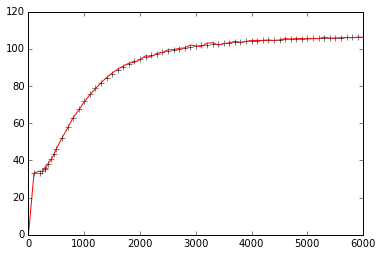

In [29]:
cp_rbf = Rbf(data['TK'], data['Cp'], function = "inverse_multiquadric")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

不同的 `RBF` 核的結果也不同。

### 高維 `RBF` 插值

In [30]:
from mpl_toolkits.mplot3d import Axes3D

三維數據點：

In [31]:
x, y = np.mgrid[-np.pi/2:np.pi/2:5j, -np.pi/2:np.pi/2:5j]
z = np.cos(np.sqrt(x**2 + y**2))

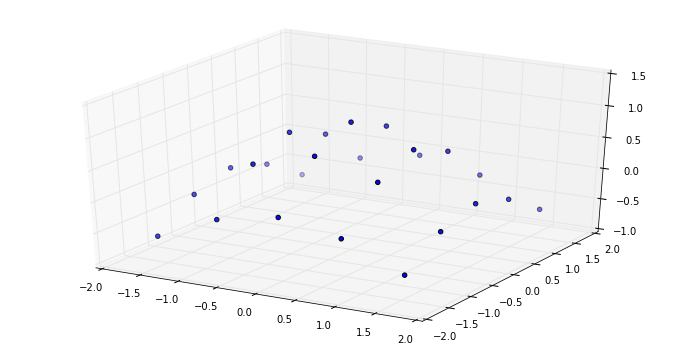

In [32]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection="3d")
ax.scatter(x,y,z)

3維 `RBF` 插值：

In [33]:
zz = Rbf(x, y, z)

In [34]:
xx, yy = np.mgrid[-np.pi/2:np.pi/2:50j, -np.pi/2:np.pi/2:50j]
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection="3d")
ax.plot_surface(xx,yy,zz(xx,yy),rstride=1, cstride=1, cmap=plt.cm.jet)